In [402]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np
import itertools


In [403]:
data = pd.read_csv("./2_merge_data/TABLE1.csv")


In [404]:
data['YearMonth'] = data['Year'].astype(str) + '-' + data['Publish_month'].astype(int).astype(str)
data.head()

,Eid,Agency_Name,Subject_Field,Publish_month,Year,Country,Title,YearMonth
0,2-s2.0-85053164279,Ratchadapisek Sompoch Endowment Fund,Materials Science,10.0,2018,Thailand,Effects of iron content on the microstructure ...,2018-10
1,2-s2.0-85053164279,Ratchadapisek Sompoch Endowment Fund,Physics and Astronomy,10.0,2018,Thailand,Effects of iron content on the microstructure ...,2018-10
2,2-s2.0-85053164279,Surface Coatings Technology for Metals and Mat...,Materials Science,10.0,2018,Thailand,Effects of iron content on the microstructure ...,2018-10
3,2-s2.0-85053164279,Surface Coatings Technology for Metals and Mat...,Physics and Astronomy,10.0,2018,Thailand,Effects of iron content on the microstructure ...,2018-10
4,2-s2.0-85053164279,NSFC,Materials Science,10.0,2018,China,Effects of iron content on the microstructure ...,2018-10


In [405]:
data.loc[:, 'YearMonth'] = pd.to_datetime(data['YearMonth'], errors='coerce', format='%Y-%m')
data.head()

,Eid,Agency_Name,Subject_Field,Publish_month,Year,Country,Title,YearMonth
0,2-s2.0-85053164279,Ratchadapisek Sompoch Endowment Fund,Materials Science,10.0,2018,Thailand,Effects of iron content on the microstructure ...,2018-10-01 00:00:00
1,2-s2.0-85053164279,Ratchadapisek Sompoch Endowment Fund,Physics and Astronomy,10.0,2018,Thailand,Effects of iron content on the microstructure ...,2018-10-01 00:00:00
2,2-s2.0-85053164279,Surface Coatings Technology for Metals and Mat...,Materials Science,10.0,2018,Thailand,Effects of iron content on the microstructure ...,2018-10-01 00:00:00
3,2-s2.0-85053164279,Surface Coatings Technology for Metals and Mat...,Physics and Astronomy,10.0,2018,Thailand,Effects of iron content on the microstructure ...,2018-10-01 00:00:00
4,2-s2.0-85053164279,NSFC,Materials Science,10.0,2018,China,Effects of iron content on the microstructure ...,2018-10-01 00:00:00


In [406]:
data_grouped = data.groupby(['YearMonth', 'Subject_Field', 'Country'])['Eid'].count().reset_index()
data_grouped.head()

,YearMonth,Subject_Field,Country,Eid
0,2017-01-01,Agricultural and Biological Sciences,Japan,1
1,2017-01-01,Agricultural and Biological Sciences,Russia,1
2,2017-01-01,Agricultural and Biological Sciences,Thailand,25
3,2017-01-01,Agricultural and Biological Sciences,United States,2
4,2017-01-01,"Biochemistry, Genetics and Molecular Biology",Japan,5


In [407]:
subject_country_data = data_grouped[(data_grouped['Subject_Field'] == 'Agricultural and Biological Sciences') & (data_grouped['Country'] == 'Thailand')]
subject_country_data.head()

,YearMonth,Subject_Field,Country,Eid
2,2017-01-01,Agricultural and Biological Sciences,Thailand,25
142,2017-02-01,Agricultural and Biological Sciences,Thailand,22
285,2017-03-01,Agricultural and Biological Sciences,Thailand,27
438,2017-04-01,Agricultural and Biological Sciences,Thailand,28
613,2017-05-01,Agricultural and Biological Sciences,Thailand,8


In [408]:
subject_country_data.loc[:, 'YearMonth'] = pd.to_datetime(subject_country_data['YearMonth'], errors='coerce', format='%Y-%m')
subject_country_data

,YearMonth,Subject_Field,Country,Eid
2,2017-01-01,Agricultural and Biological Sciences,Thailand,25
142,2017-02-01,Agricultural and Biological Sciences,Thailand,22
285,2017-03-01,Agricultural and Biological Sciences,Thailand,27
438,2017-04-01,Agricultural and Biological Sciences,Thailand,28
613,2017-05-01,Agricultural and Biological Sciences,Thailand,8
...,...,...,...,...
14809,2023-08-01,Agricultural and Biological Sciences,Thailand,28
14971,2023-09-01,Agricultural and Biological Sciences,Thailand,48
15084,2023-10-01,Agricultural and Biological Sciences,Thailand,14
15136,2023-11-01,Agricultural and Biological Sciences,Thailand,1


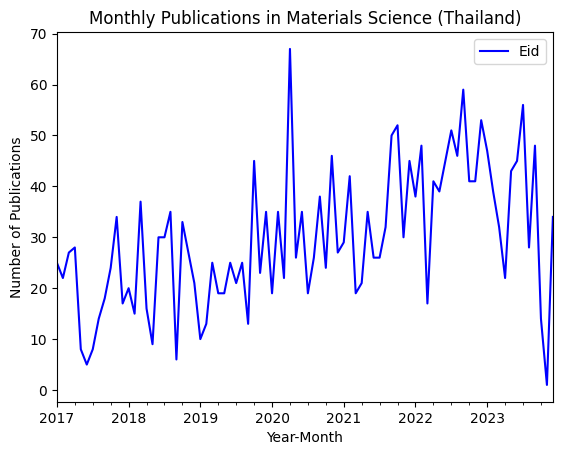

In [409]:
subject_country_data = subject_country_data.set_index('YearMonth')

subject_country_data.plot(y='Eid', title="Monthly Publications in Materials Science (Thailand)", color='blue')
plt.xlabel('Year-Month')
plt.ylabel('Number of Publications')
plt.show()

In [410]:
subject_country_data = subject_country_data.asfreq('MS')
subject_country_data

,Subject_Field,Country,Eid
YearMonth,,,
2017-01-01,Agricultural and Biological Sciences,Thailand,25
2017-02-01,Agricultural and Biological Sciences,Thailand,22
2017-03-01,Agricultural and Biological Sciences,Thailand,27
2017-04-01,Agricultural and Biological Sciences,Thailand,28
2017-05-01,Agricultural and Biological Sciences,Thailand,8
...,...,...,...
2023-08-01,Agricultural and Biological Sciences,Thailand,28
2023-09-01,Agricultural and Biological Sciences,Thailand,48
2023-10-01,Agricultural and Biological Sciences,Thailand,14


In [411]:
train_size = int(len(subject_country_data) * 0.8)
train, test = subject_country_data[:train_size], subject_country_data[train_size:]

In [ ]:
model = ARIMA(train['Eid'], order=(0, 1, 1))  # ARIMA(1, 1, 1) as an example
model_fit = model.fit()

In [413]:
forecast = model_fit.forecast(steps=len(test))


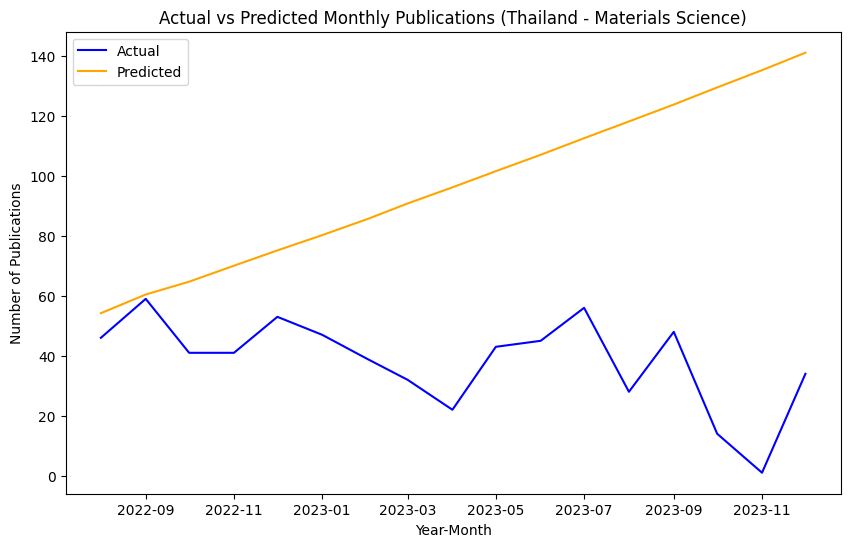

In [414]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Eid'], label="Actual", color='blue')
plt.plot(test.index, forecast, label="Predicted", color='orange')
plt.title("Actual vs Predicted Monthly Publications (Thailand - Materials Science)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Publications")
plt.legend()
plt.show()

In [415]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

aic = []
minAic = 1000000
order = "abc"

for param in pdq:
    try:
        model = ARIMA(subject_country_data['Eid'].dropna(), order = param)
        results = model.fit()
        a = 'Order: '+str(param) +' AIC: ' + str(results.aic)
        if results.aic < minAic:
            minAic = results.aic
            order = str(param)
        aic.append(a)
    except:
        continue

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramet

In [416]:
print(order , minAic)

(0, 1, 1) 654.1599211176095
